In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_path = r'D:\sem6\Machine Learning\Project\sign-language-recognition-project\code\gesture\train'
test_path = r'D:\sem6\Machine Learning\Project\sign-language-recognition-project\code\gesture\test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)
imgs, labels = next(train_batches)

Found 3010 images belonging to 10 classes.
Found 310 images belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

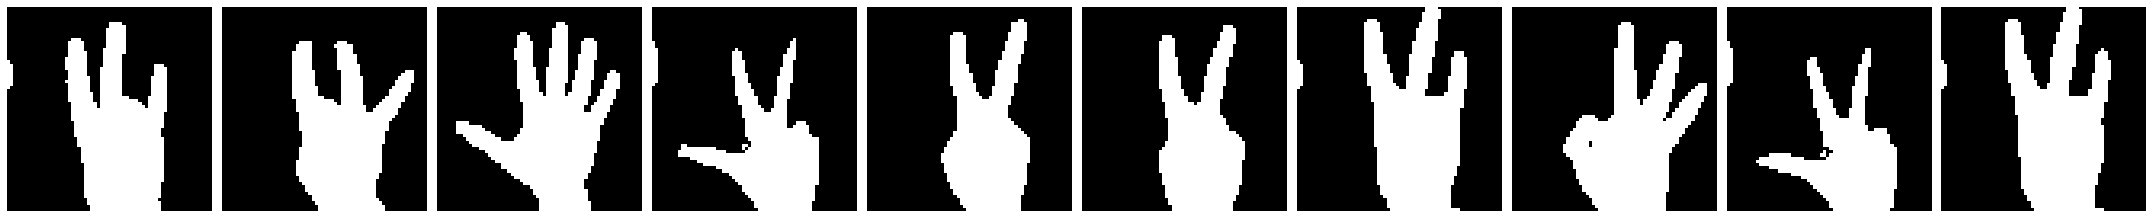

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [4]:
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [5]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(10,activation ="softmax"))

In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
# print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')




Epoch 1/10
301/301 [==============================] - 30s 91ms/step - loss: 0.5041 - accuracy: 0.9086 - val_loss: 0.6926 - val_accuracy: 0.7968 - lr: 0.0010
Epoch 2/10
301/301 [==============================] - 12s 40ms/step - loss: 0.0048 - accuracy: 0.9997 - val_loss: 0.5661 - val_accuracy: 0.8806 - lr: 0.0010
Epoch 3/10
301/301 [==============================] - 12s 39ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5585 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 4/10
301/301 [==============================] - 12s 40ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5229 - val_accuracy: 0.8806 - lr: 0.0010
Epoch 5/10
301/301 [==============================] - 12s 40ms/step - loss: 8.8200e-04 - accuracy: 1.0000 - val_loss: 0.5267 - val_accuracy: 0.8806 - lr: 0.0010
Epoch 6/10
301/301 [==============================] - 12s 39ms/step - loss: 7.1103e-04 - accuracy: 1.0000 - val_loss: 0.5160 - val_accuracy: 0.8806 - lr: 5.0000e-04
Epoch 7/10
301/301 [==========================

In [7]:
#model.save('best_model_dataflair.h5')
model.save('best_model_dataflair3.h5')

print(history2.history)


{'loss': [0.5041167736053467, 0.004772684536874294, 0.0019156740745529532, 0.0012284768745303154, 0.0008819990907795727, 0.0007110265432856977, 0.0006341597763821483, 0.0005716166342608631, 0.000519888533744961, 0.0004750659572891891], 'accuracy': [0.9086378812789917, 0.999667763710022, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.6926388144493103, 0.5660561323165894, 0.5585404634475708, 0.5229143500328064, 0.5266600847244263, 0.5160068273544312, 0.5104560852050781, 0.50797438621521, 0.5041040182113647, 0.5001521706581116], 'val_accuracy': [0.7967742085456848, 0.8806451559066772, 0.8709677457809448, 0.8806451559066772, 0.8806451559066772, 0.8806451559066772, 0.8838709592819214, 0.8870967626571655, 0.8870967626571655, 0.8870967626571655], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]}


['loss', 'accuracy']
loss of 0.9165285229682922; accuracy of 80.0000011920929%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                           

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

predictions on a small set of test data--

Six   Six   Five   Ten   Four   Eight   Ten   Seven   Five   Seven   

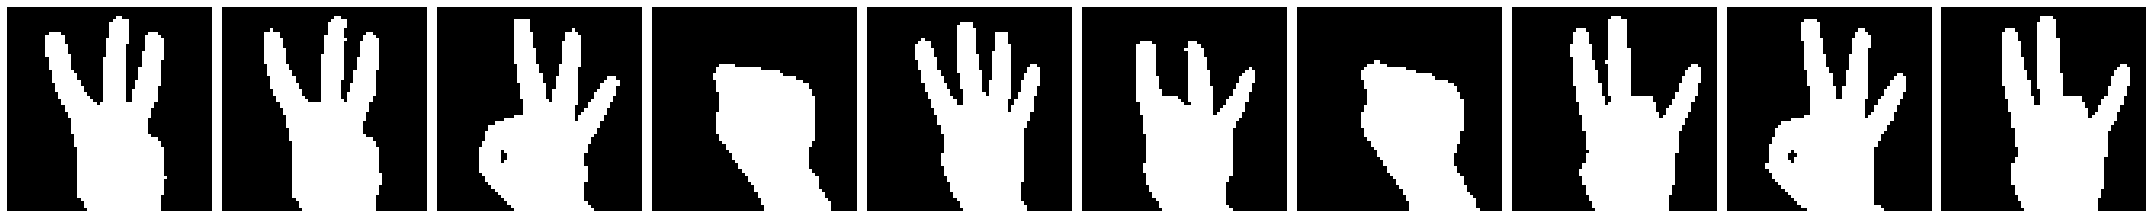

Actual labels
Six   Six   Nine   Ten   Four   Eight   Ten   Seven   Nine   Seven   (10, 64, 64, 3)


{'loss': [0.5041167736053467,
  0.004772684536874294,
  0.0019156740745529532,
  0.0012284768745303154,
  0.0008819990907795727,
  0.0007110265432856977,
  0.0006341597763821483,
  0.0005716166342608631,
  0.000519888533744961,
  0.0004750659572891891],
 'accuracy': [0.9086378812789917,
  0.999667763710022,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6926388144493103,
  0.5660561323165894,
  0.5585404634475708,
  0.5229143500328064,
  0.5266600847244263,
  0.5160068273544312,
  0.5104560852050781,
  0.50797438621521,
  0.5041040182113647,
  0.5001521706581116],
 'val_accuracy': [0.7967742085456848,
  0.8806451559066772,
  0.8709677457809448,
  0.8806451559066772,
  0.8806451559066772,
  0.8806451559066772,
  0.8838709592819214,
  0.8870967626571655,
  0.8870967626571655,
  0.8870967626571655],
 'lr': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005]}

In [8]:
imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(model.metrics_names)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names

word_dict = {0:'One',1:'Ten',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

history2.history

In [9]:
scores

[0.9165285229682922, 0.800000011920929]

In [10]:
test_batches

In [11]:
imgs

array([[[[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        ...,

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -1